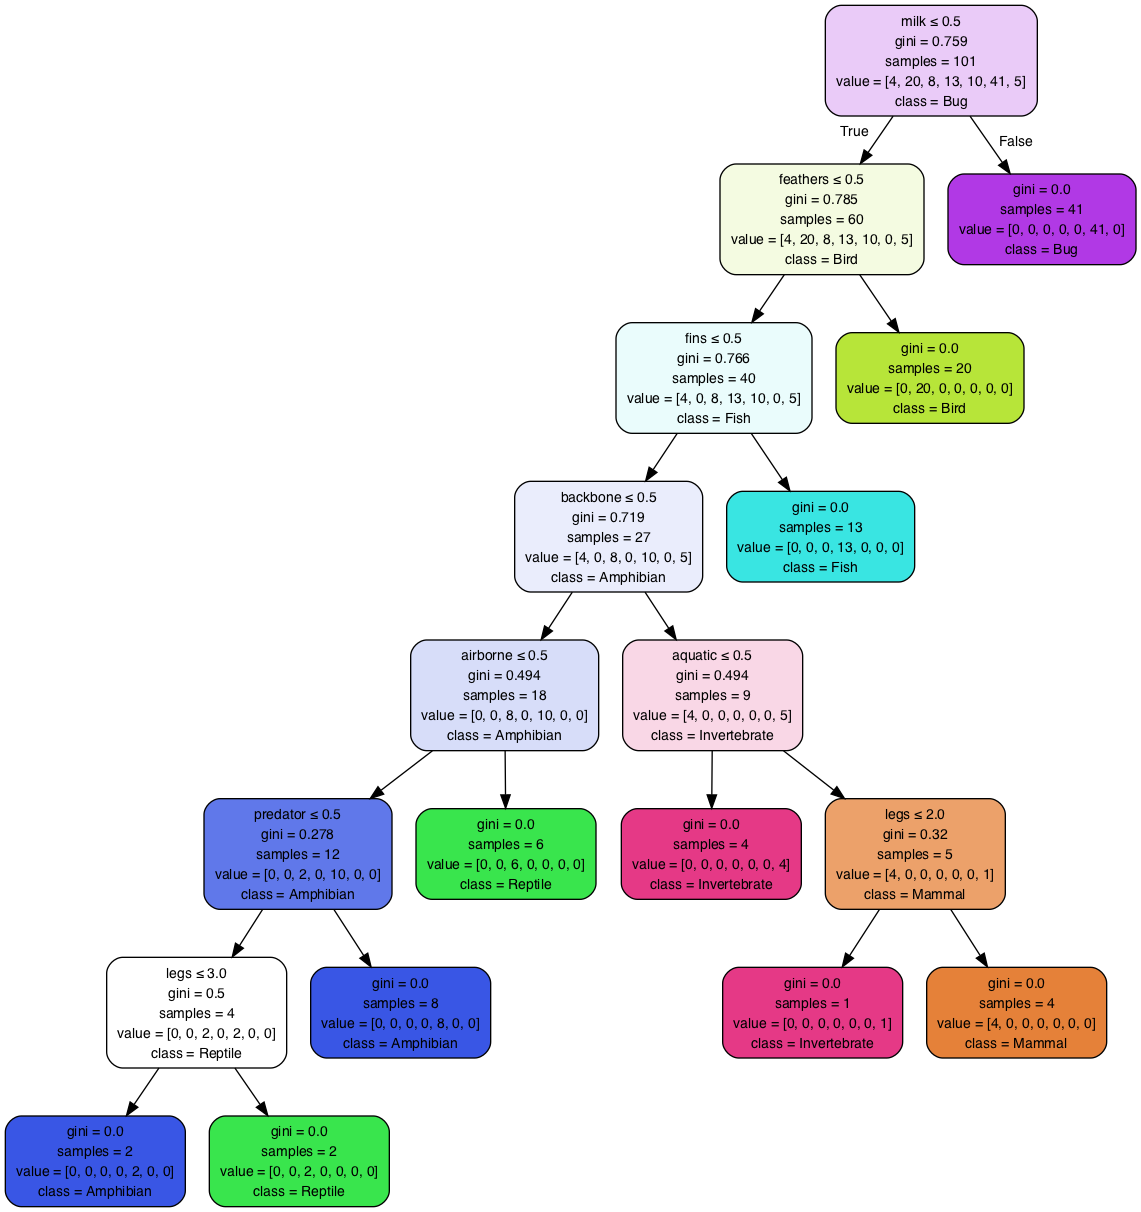

In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier


original_df=pd.read_csv('../data/zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('../data/zoo-animal-classification/class.csv', index_col=False)
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})
df = pd.merge(original_df, class_only, on='class_type', how='outer')
y=df['class_name']
del df['animal_name']
del df['class_name']
del df['class_type']
dtree=DecisionTreeClassifier()
dtree.fit(df,y)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [2]:
export_graphviz(dtree, out_file='zoo.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))

In [3]:
dot_string= dot_data.getvalue()
x = dot_string.replace("&le;", "<=")
x = x.replace("\n", "")
x = x.replace("<br/>", ",")
x = x.replace("label=<", "")
x = x.split(";")
x = x[2:-1]

In [4]:
import re
edge_list =[]
node_list =[]
element_regex = re.compile(r'.+->.+')
for i in x:
    if element_regex.match(i):
        edge_list.append(i)
    else:
        node_list.append(i)

In [5]:
edge_df = pd.DataFrame(columns=['current_node', 'parent_node'])
for i in range(0, len(edge_list)):
    print(edge_list[i])
    pattern = "(\d+)"
    a = re.findall(pattern, edge_list[i])
    source = a[0]
    destination = a[1]
    edge_df = edge_df.append({'current_node': destination, 'parent_node': source}, ignore_index=True)
edge_df

0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] 
1 -> 2 
2 -> 3 
3 -> 4 
4 -> 5 
5 -> 6 
6 -> 7 
6 -> 8 
5 -> 9 
4 -> 10 
3 -> 11 
11 -> 12 
11 -> 13 
13 -> 14 
13 -> 15 
2 -> 16 
1 -> 17 
0 -> 18 [labeldistance=2.5, labelangle=-45, headlabel="False"] 


,current_node,parent_node
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5
6,7,6
7,8,6
8,9,5
9,10,4


In [6]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [7]:
x=np.arange(10)
x.shape
np.ones(x.shape)*0.4

array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])

In [8]:
import re
def get_node_string(orig):
    print(orig)
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value =  re.search( 'value = (.+]),', orig).group(1)
    
    print(gini)
    print(type(gini))
    fig, ax = plt.subplots(figsize=(1, 3))
    ax.set_title('gini')
    ax.bar(0, float(gini))

    ax.get_xaxis().set_visible(False)
    plt.ylim(0, 1)
    plot_name = 'plots/'+'gini' + str(node_name) + '.png'
    print(plot_name)
    plt.show()
    
    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color, 'value': value, 'plot_name': plot_name}
    
    #check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])
    
    if gini_match is None: 
        attribute = s[0].split("[")[1]
        temp_row['attribute']= attribute
   
        
    return (temp_row, fig)

0 [milk <= 0.5,gini = 0.759,samples = 101,value = [4, 20, 8, 13, 10, 41, 5],class = Bug>, fillcolor="#b139e542"] 
0.759
<class 'str'>
plots/gini0.png


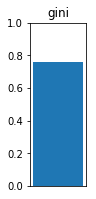

1 [feathers <= 0.5,gini = 0.785,samples = 60,value = [4, 20, 8, 13, 10, 0, 5],class = Bird>, fillcolor="#b7e53926"] 
0.785
<class 'str'>
plots/gini1.png


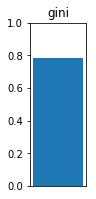

2 [fins <= 0.5,gini = 0.766,samples = 40,value = [4, 0, 8, 13, 10, 0, 5],class = Fish>, fillcolor="#39e5e21a"] 
0.766
<class 'str'>
plots/gini2.png


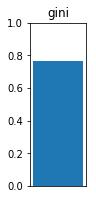

3 [backbone <= 0.5,gini = 0.719,samples = 27,value = [4, 0, 8, 0, 10, 0, 5],class = Amphibian>, fillcolor="#3956e51b"] 
0.719
<class 'str'>
plots/gini3.png


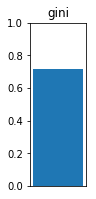

4 [airborne <= 0.5,gini = 0.494,samples = 18,value = [0, 0, 8, 0, 10, 0, 0],class = Amphibian>, fillcolor="#3956e533"] 
0.494
<class 'str'>
plots/gini4.png


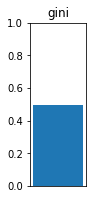

5 [predator <= 0.5,gini = 0.278,samples = 12,value = [0, 0, 2, 0, 10, 0, 0],class = Amphibian>, fillcolor="#3956e5cc"] 
0.278
<class 'str'>
plots/gini5.png


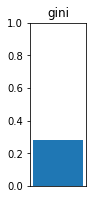

6 [legs <= 3.0,gini = 0.5,samples = 4,value = [0, 0, 2, 0, 2, 0, 0],class = Reptile>, fillcolor="#39e54d00"] 
0.5
<class 'str'>
plots/gini6.png


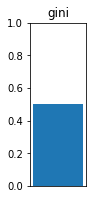

7 [gini = 0.0,samples = 2,value = [0, 0, 0, 0, 2, 0, 0],class = Amphibian>, fillcolor="#3956e5ff"] 
0.0
<class 'str'>
plots/gini7.png


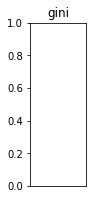

8 [gini = 0.0,samples = 2,value = [0, 0, 2, 0, 0, 0, 0],class = Reptile>, fillcolor="#39e54dff"] 
0.0
<class 'str'>
plots/gini8.png


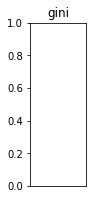

9 [gini = 0.0,samples = 8,value = [0, 0, 0, 0, 8, 0, 0],class = Amphibian>, fillcolor="#3956e5ff"] 
0.0
<class 'str'>
plots/gini9.png


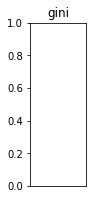

10 [gini = 0.0,samples = 6,value = [0, 0, 6, 0, 0, 0, 0],class = Reptile>, fillcolor="#39e54dff"] 
0.0
<class 'str'>
plots/gini10.png


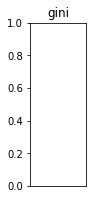

11 [aquatic <= 0.5,gini = 0.494,samples = 9,value = [4, 0, 0, 0, 0, 0, 5],class = Invertebrate>, fillcolor="#e5398633"] 
0.494
<class 'str'>
plots/gini11.png


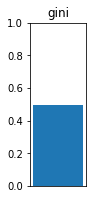

12 [gini = 0.0,samples = 4,value = [0, 0, 0, 0, 0, 0, 4],class = Invertebrate>, fillcolor="#e53986ff"] 
0.0
<class 'str'>
plots/gini12.png


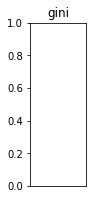

13 [legs <= 2.0,gini = 0.32,samples = 5,value = [4, 0, 0, 0, 0, 0, 1],class = Mammal>, fillcolor="#e58139bf"] 
0.32
<class 'str'>
plots/gini13.png


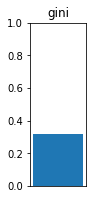

14 [gini = 0.0,samples = 1,value = [0, 0, 0, 0, 0, 0, 1],class = Invertebrate>, fillcolor="#e53986ff"] 
0.0
<class 'str'>
plots/gini14.png


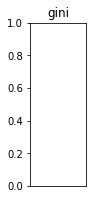

15 [gini = 0.0,samples = 4,value = [4, 0, 0, 0, 0, 0, 0],class = Mammal>, fillcolor="#e58139ff"] 
0.0
<class 'str'>
plots/gini15.png


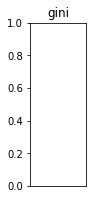

16 [gini = 0.0,samples = 13,value = [0, 0, 0, 13, 0, 0, 0],class = Fish>, fillcolor="#39e5e2ff"] 
0.0
<class 'str'>
plots/gini16.png


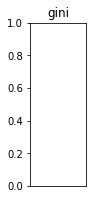

17 [gini = 0.0,samples = 20,value = [0, 20, 0, 0, 0, 0, 0],class = Bird>, fillcolor="#b7e539ff"] 
0.0
<class 'str'>
plots/gini17.png


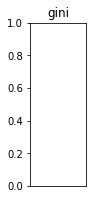

18 [gini = 0.0,samples = 41,value = [0, 0, 0, 0, 0, 41, 0],class = Bug>, fillcolor="#b139e5ff"] 
0.0
<class 'str'>
plots/gini18.png


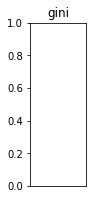

In [9]:
ult_df = pd.DataFrame(columns=['current_node', 'attribute', 'gini', 'samples', 'value', 'class_name', 'color', 'plot_name'])
# ult_df = df_.fillna(0) # with 0s rather than NaNs

ult_list = {}
for i in range(0, len(node_list)):
    (node_string, fig) = get_node_string(node_list[i])
    ult_df = ult_df.append(node_string, ignore_index=True)
    fig.savefig('../treant-js/examples/decision-tree/' + node_string['plot_name'], pad_inches=0.1, bbox_inches="tight")

In [10]:
ult_df

,current_node,attribute,gini,samples,value,class_name,color,plot_name
0,0,milk <= 0.5,0.759,101,"[4, 20, 8, 13, 10, 41, 5]",Bug,"""#b139e542""",plots/gini0.png
1,1,feathers <= 0.5,0.785,60,"[4, 20, 8, 13, 10, 0, 5]",Bird,"""#b7e53926""",plots/gini1.png
2,2,fins <= 0.5,0.766,40,"[4, 0, 8, 13, 10, 0, 5]",Fish,"""#39e5e21a""",plots/gini2.png
3,3,backbone <= 0.5,0.719,27,"[4, 0, 8, 0, 10, 0, 5]",Amphibian,"""#3956e51b""",plots/gini3.png
4,4,airborne <= 0.5,0.494,18,"[0, 0, 8, 0, 10, 0, 0]",Amphibian,"""#3956e533""",plots/gini4.png
5,5,predator <= 0.5,0.278,12,"[0, 0, 2, 0, 10, 0, 0]",Amphibian,"""#3956e5cc""",plots/gini5.png
6,6,legs <= 3.0,0.5,4,"[0, 0, 2, 0, 2, 0, 0]",Reptile,"""#39e54d00""",plots/gini6.png
7,7,NaN,0.0,2,"[0, 0, 0, 0, 2, 0, 0]",Amphibian,"""#3956e5ff""",plots/gini7.png
8,8,NaN,0.0,2,"[0, 0, 2, 0, 0, 0, 0]",Reptile,"""#39e54dff""",plots/gini8.png
9,9,NaN,0.0,8,"[0, 0, 0, 0, 8, 0, 0]",Amphibian,"""#3956e5ff""",plots/gini9.png


In [11]:
new_df = ult_df.merge(edge_df, on='current_node', how='outer')
new_df
# new_df.fillna(0)

,current_node,attribute,gini,samples,value,class_name,color,plot_name,parent_node
0,0,milk <= 0.5,0.759,101,"[4, 20, 8, 13, 10, 41, 5]",Bug,"""#b139e542""",plots/gini0.png,NaN
1,1,feathers <= 0.5,0.785,60,"[4, 20, 8, 13, 10, 0, 5]",Bird,"""#b7e53926""",plots/gini1.png,0
2,2,fins <= 0.5,0.766,40,"[4, 0, 8, 13, 10, 0, 5]",Fish,"""#39e5e21a""",plots/gini2.png,1
3,3,backbone <= 0.5,0.719,27,"[4, 0, 8, 0, 10, 0, 5]",Amphibian,"""#3956e51b""",plots/gini3.png,2
4,4,airborne <= 0.5,0.494,18,"[0, 0, 8, 0, 10, 0, 0]",Amphibian,"""#3956e533""",plots/gini4.png,3
5,5,predator <= 0.5,0.278,12,"[0, 0, 2, 0, 10, 0, 0]",Amphibian,"""#3956e5cc""",plots/gini5.png,4
6,6,legs <= 3.0,0.5,4,"[0, 0, 2, 0, 2, 0, 0]",Reptile,"""#39e54d00""",plots/gini6.png,5
7,7,NaN,0.0,2,"[0, 0, 0, 0, 2, 0, 0]",Amphibian,"""#3956e5ff""",plots/gini7.png,6
8,8,NaN,0.0,2,"[0, 0, 2, 0, 0, 0, 0]",Reptile,"""#39e54dff""",plots/gini8.png,6
9,9,NaN,0.0,8,"[0, 0, 0, 0, 8, 0, 0]",Amphibian,"""#3956e5ff""",plots/gini9.png,5


In [12]:
full_string = ""
for index, row in new_df.iterrows():
    node_name = row['current_node']
    attribute = row['attribute']
    plot_name = row['plot_name']
    gini = row['gini']
    if node_name=='0':
        result = 'node'+ str(node_name) + ' = {\n' + '\t text: { \n\t\tattribute: "' + gini + '"\n\t},\n\timage: "plots/gini0.png"\n},'
    else:
        parent = row['parent_node']
        result = 'node'+ str(node_name) + ' = {\n' + "\tparent: node" + str(parent) + ',\n\t text: { \n\t\tgini: "' + gini + '"\n\t\t},\n\timage: "'+ plot_name +'"\n},'
    print(result)
    full_string+=result

node0 = {
	 text: { 
		attribute: "0.759"
	},
	image: "plots/gini0.png"
},
node1 = {
	parent: node0,
	 text: { 
		gini: "0.785"
		},
	image: "plots/gini1.png"
},
node2 = {
	parent: node1,
	 text: { 
		gini: "0.766"
		},
	image: "plots/gini2.png"
},
node3 = {
	parent: node2,
	 text: { 
		gini: "0.719"
		},
	image: "plots/gini3.png"
},
node4 = {
	parent: node3,
	 text: { 
		gini: "0.494"
		},
	image: "plots/gini4.png"
},
node5 = {
	parent: node4,
	 text: { 
		gini: "0.278"
		},
	image: "plots/gini5.png"
},
node6 = {
	parent: node5,
	 text: { 
		gini: "0.5"
		},
	image: "plots/gini6.png"
},
node7 = {
	parent: node6,
	 text: { 
		gini: "0.0"
		},
	image: "plots/gini7.png"
},
node8 = {
	parent: node6,
	 text: { 
		gini: "0.0"
		},
	image: "plots/gini8.png"
},
node9 = {
	parent: node5,
	 text: { 
		gini: "0.0"
		},
	image: "plots/gini9.png"
},
node10 = {
	parent: node4,
	 text: { 
		gini: "0.0"
		},
	image: "plots/gini10.png"
},
node11 = {
	parent: node3,
	 text: { 
		gini: "0.494"
		},
	ima

In [13]:
first_part = "var config = {container: '#basic-example', connectors: {type: 'step'}, node: { HTMLclass: 'nodeExample1'}},"
last_part = "chart_config = [config," + ','.join(['node' + str(x) for x in list(new_df['current_node'].keys())])+'];'
whole_string = first_part + full_string + last_part
text_file = open("../treant-js/examples/decision-tree/basic-example.js", "w")
text_file.write(whole_string)
text_file.close()

In [14]:
whole_string

'var config = {container: \'#basic-example\', connectors: {type: \'step\'}, node: { HTMLclass: \'nodeExample1\'}},node0 = {\n\t text: { \n\t\tattribute: "0.759"\n\t},\n\timage: "plots/gini0.png"\n},node1 = {\n\tparent: node0,\n\t text: { \n\t\tgini: "0.785"\n\t\t},\n\timage: "plots/gini1.png"\n},node2 = {\n\tparent: node1,\n\t text: { \n\t\tgini: "0.766"\n\t\t},\n\timage: "plots/gini2.png"\n},node3 = {\n\tparent: node2,\n\t text: { \n\t\tgini: "0.719"\n\t\t},\n\timage: "plots/gini3.png"\n},node4 = {\n\tparent: node3,\n\t text: { \n\t\tgini: "0.494"\n\t\t},\n\timage: "plots/gini4.png"\n},node5 = {\n\tparent: node4,\n\t text: { \n\t\tgini: "0.278"\n\t\t},\n\timage: "plots/gini5.png"\n},node6 = {\n\tparent: node5,\n\t text: { \n\t\tgini: "0.5"\n\t\t},\n\timage: "plots/gini6.png"\n},node7 = {\n\tparent: node6,\n\t text: { \n\t\tgini: "0.0"\n\t\t},\n\timage: "plots/gini7.png"\n},node8 = {\n\tparent: node6,\n\t text: { \n\t\tgini: "0.0"\n\t\t},\n\timage: "plots/gini8.png"\n},node9 = {\n\tpar